In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'E:\DSBDAL\DSBDALExam DataSets\DSBDALExam DataSets\Iris\Iris.csv')

# Display first few rows
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
# Step 1: Data Cleaning
# Check missing values
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
print("Missing Values:\n", df.isnull().sum())

# Check "?" entries
print("Question Mark Entries:\n", (df == '?').sum())

# Check negative values
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
print("Negative Values:\n", (df[numeric_cols] < 0).sum())

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Question Mark Entries:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Negative Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64


In [3]:
# Step 2: Error Correction (Remove outliers using IQR)
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for col in numeric_cols:
    df = remove_outliers(df, col)

print("\nShape after outlier removal:", df.shape)


Shape after outlier removal: (146, 5)


In [4]:
# Step 3: Data Transformation (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

scaler = MinMaxScaler()
X = df[numeric_cols]
X_scaled = scaler.fit_transform(X)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(df['species'])


Accuracy Comparison:
Logistic Regression Accuracy: 93.33333333333333 %
k-Nearest Neighbors Accuracy: 93.33333333333333 %


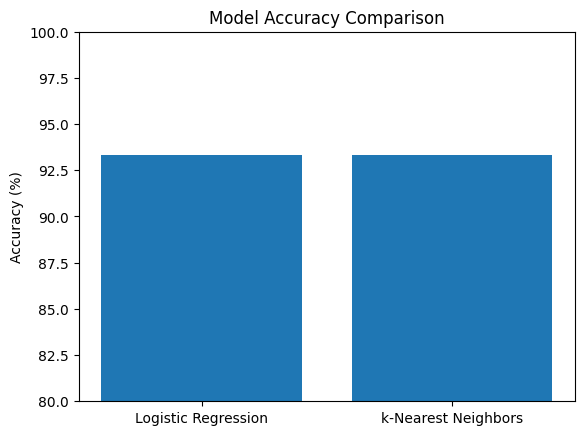

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Model Building

# Logistic Regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Step 6: Display Results
print("\nAccuracy Comparison:")
print("Logistic Regression Accuracy:", accuracy_logreg * 100, "%")
print("k-Nearest Neighbors Accuracy:", accuracy_knn * 100, "%")

# Step 7: Optional: Plot Accuracy Comparison
models = ['Logistic Regression', 'k-Nearest Neighbors']
accuracies = [accuracy_logreg, accuracy_knn]

plt.bar(models, [a * 100 for a in accuracies])
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(80, 100)
plt.show()